# Pandas and Matplotlib Homework

In [240]:
#load the libraries using the normal convention
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
##prevent plotting errors
%matplotlib inline

In [241]:
#Load our excel files of interest into pandas
NHL_Goalies = pd.read_excel('NHLGoalies2016_2017.xls',na_values='',sheetname=0) 
GAA_ = pd.read_excel('NHLGoalies2016_2017.xls',na_values='',sheetname='5vs5')

/home/chxwu/anaconda3/envs/panda/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


#Appendix:
 1. DF = Pandas DataFrame
 2. NHL_Goalies DF = NHL_Goalies 
 3. GAA_ DF = GAA_

### Q1A) Create a new DF (*called NHL_Ones*) by:
#### Filtering the correct DF for Goalies that played 1 game <font color='red'> (GP = Games played)</font>

Notes: How would you find the 'GP' column in these files? Review from Pandas Lecture

In [242]:
#Answer 1A:
NHL_Ones = NHL_Goalies[NHL_Goalies.GP ==1]
NHL_Ones.Salary


1          NaN
13         NaN
14    575000.0
16    708750.0
22    780000.0
27    650000.0
29    925000.0
32         NaN
42    575000.0
50    673334.0
67         NaN
80         NaN
87    832500.0
89         NaN
90    892500.0
Name: Salary, dtype: float64

 ## Q1B) 
 #### A. Find the value of the minimum Salary for the entire dataset 
 #### B. Replace the missing values from the NHL_Ones DF with this
 #### C. Create a new DF after replacement by **adding** a column called  "Adjusted_Salary"
 #### D. I would like to only see the old "Salary" column and the "Adjusted Salary" column from the new Dataframe

In [243]:
#Answer 1B:

# A, minimum salary is 575000
salaries = NHL_Goalies.loc[:,'Salary']
min_salary = salaries[0]
for salary in salaries:
    if salary < min_salary:
        min_salary = salary

# B, 
# To replace all nans in DF
NHL_Ones = NHL_Ones.replace(np.nan,min_salary) 

# if only data in column salary need to be replaced 
#NHL_Ones[['Salary']] = NHL_Ones[['Salary']].replace(np.nan,min_salary)

# C
New_Df = pd.DataFrame(NHL_Ones.Salary.rename("Adjusted_Salary"))

# D
NHL_Ones = NHL_Goalies[NHL_Goalies.GP ==1]
pd.concat([NHL_Ones.Salary, New_Df.Adjusted_Salary], axis=1)

,Salary,Adjusted_Salary
1,NaN,575000.0
13,NaN,575000.0
14,575000.0,575000.0
16,708750.0,708750.0
22,780000.0,780000.0
27,650000.0,650000.0
29,925000.0,925000.0
32,NaN,575000.0
42,575000.0,575000.0
50,673334.0,673334.0


#### Notes:
1. Note where the minimum Salary value is coming & where you are going to assign it to
2. Review notes from pandas **replacement**
3. Look up Numpy definition for null
4. Look up Pandas **Series** Naming 
5. Review concat function in Pandas
6. Review how to slice columns

### Q2) A. Subset the NHL goalies data to include Goalies that played in more than 25 games AND have a GAA lower than 3.00 and store the New DF as 'workhorse'


Notes: 
1. Review notes from Pandas Lecture on creating masks
2. Internet search for Multiple Boolean indexing on multiple columns in a Pandas DataFrame

In [244]:
#Answer 2:
workhorse = NHL_Goalies[NHL_Goalies.GP > 25]
workhorse = workhorse[workhorse.GAA < 3]
workhorse

,Last Name,First Name,Team,DOB,Birth City,S/P,Cntry,Nat,Ht,Wt,...,Cap Hit,Pace,1st,2nd,3rd,Star,GPS,Ginj,Injuries,CHIP
0,Allen,Jake,STL,1990-08-07,Fredericton,NB,CAN,CAN,74,203,...,2350000.0,104.033662,9.0,7.0,6.0,22.0,9.8,NaN,NaN,
2,Andersen,Frederik,TOR,1989-10-02,Herning,NaN,DNK,DNK,76,230,...,5000000.0,118.931391,9.0,6.0,6.0,21.0,13.1,2.0,Upper body,121951
3,Anderson,Craig,OTT,1981-05-21,Park Ridge,IL,USA,USA,74,187,...,4200000.0,114.858819,8.0,2.0,5.0,15.0,9.2,2.0,Lower body,102439
5,Bernier,Jonathan,ANA,1988-08-07,Laval,QC,CAN,CAN,72,184,...,4150000.0,113.938340,5.0,0.0,2.0,7.0,6.0,3.0,Upper body,151829
9,Bishop,Ben,"TBL, LAK",1986-11-21,Denver,CO,USA,USA,79,216,...,5950000.0,108.466747,0.0,1.0,5.0,6.0,5.7,9.0,Lower body,653049
10,Bobrovsky,Sergei,CBJ,1988-09-20,Novokuznetsk,NaN,RUS,RUS,74,182,...,7425000.0,109.525950,17.0,6.0,6.0,29.0,14.9,2.0,Illness,181098
12,Budaj,Peter,"LAK, TBL",1982-09-18,Banská Bystrica,NaN,SVK,SVK,73,196,...,600000.0,108.110995,4.0,7.0,4.0,15.0,8.6,NaN,NaN,
15,Condon,Mike,"PIT, OTT",1990-04-27,Holliston,MA,USA,USA,74,197,...,575000.0,112.079733,9.0,1.0,4.0,14.0,6.8,NaN,NaN,
18,Crawford,Corey,CHI,1984-12-31,Montreal,QC,CAN,CAN,74,216,...,6000000.0,112.428393,8.0,5.0,0.0,13.0,11.0,11.0,"Appendectomy, Illness",804878
19,Darling,Scott,CHI,1988-12-22,Newport News,VA,USA,USA,78,232,...,587500.0,109.476386,5.0,5.0,5.0,15.0,6.2,5.0,Upper body,35823.2


### Q3. Create 2 python functions that: 
<br> </br>
#### A. Creates/*Returns* a new DataFrame that displays the number of missing values in every column. 
#### This new DataFrame has one new column named "Missing" with the sum of the missing values from the columns

### Notes 
***Function takes one argument: An input DataFrame***
<br> </br>
<br> </br>
** One Proposed method:**
1. Create a pandas series object from the sum of the nulls in every column (review class notes)
2. Convert the series object to a DataFrame and pass the list of column names from the input DataFrame as the index. (read Pandas Help online)
3. During the conversion of the series object to a DataFrame pass a columns argument to create a name for the new Output DataFrame's Column.

### Expected Output:
<img src='Missing_cols_expectedoutput.png'>

In [245]:
# Answer 3A: CODE HERE; Please comment each part




def missing_cols(df):
    df2 = NHL_Goalies.replace('NaN',np.nan)
    ls = df2.isnull().sum()
    df2 = pd.DataFrame(ls.rename('Missing'))
    return df2
# the example data frame to check is NHL_Goalies
print(missing_cols(NHL_Goalies))

            Missing
Last Name         0
First Name        0
Team              0
DOB               0
Birth City        0
S/P              34
Cntry             0
Nat               0
Ht                0
Wt                0
Sh                0
Dft Yr           17
Rd               17
Ovrl             17
GP                0
GS                0
GR                0
W                 0
L                 0
T                 0
OTL               0
SA                0
SV                0
GA                0
SV%               0
GAA               0
GSAA              0
MIN               0
SO                0
G                 0
...             ...
xGSAA             0
ZS%               0
OZS               0
DZS               0
NZS               0
CF                0
FF                0
SF                0
xGF               0
GF                0
RebF              0
RushF             0
SOS               0
SOG               0
SO SV%            0
SOW               0
SOL               0
NMC              77


#### B. Creates a new *column* called 'missing_values' in the input DF that sums the missing values in each row.

### Notes: 
***Function takes one argument: An input DataFrame***
<br> </br>
<br> </br>
Review the Column creation method in lecture and the axis arguments needed

### Expected Output:
<img src= 'missingrows_expectedoutput.png'>

In [246]:
#Answer 3B here; Please comment each part
def missing_values(df):
    #replace the NaN with np value if necessary 
    df2 = NHL_Goalies.replace('NaN',np.nan)
    # sum the null value in each row and add it to missing_values at the back of the data frame
    df2['missing_values'] =df2.isnull().sum(axis=1)
    return df2
print(missing_values(NHL_Goalies))

      Last Name     First Name      Team         DOB       Birth City  S/P  \
0         Allen           Jake       STL  1990-08-07      Fredericton   NB   
1         Alves          Jorge       CAR  1979-01-30           Boston   MA   
2      Andersen       Frederik       TOR  1989-10-02          Herning  NaN   
3      Anderson          Craig       OTT  1981-05-21       Park Ridge   IL   
4       Bachman        Richard       VAN  1987-07-25   Salt Lake City   UT   
5       Bernier       Jonathan       ANA  1988-08-07            Laval   QC   
6         Berra           Reto       FLA  1987-01-03           Bulach  NaN   
7        Berube  Jean-Francois       NYI  1991-07-13       Repentigny   QC   
8        Bibeau        Antoine       TOR  1994-05-01    Victoriaville   QC   
9        Bishop            Ben  TBL, LAK  1986-11-21           Denver   CO   
10    Bobrovsky         Sergei       CBJ  1988-09-20     Novokuznetsk  NaN   
11     Brossoit        Laurent       EDM  1993-03-23     Port Al

### Q4) Matplotlib Question Plot in one figure and 2 side by side plots:
<br> </br>
#### A. Plot the histogram of the all the GAA of the NHL_Goalies DF  AND the goalies that played in more than 25 games with a GAA < 3.00, 
#### B. Label the Titles of the plots differently (*ie EntireSet + Subset*)
#### C. Change the color of one of the plots from the default

# Notes

1. convert your column of interest into a NumPY array (look up online for usage)
2. Review: https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html

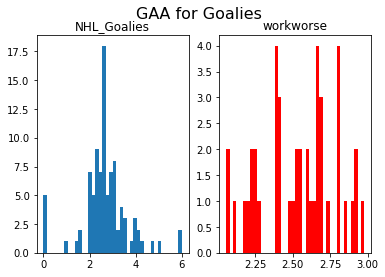

In [247]:
#Answer 4 here: pleae comment
#set the number of bins to 40
n_bins = 40

# Get GAA for all goalies and workhorse
x1 = NHL_Goalies.GAA
x2 = workhorse.GAA

fig = plt.figure()

# add the first subplot 
ax1 = fig.add_subplot(121)
a = ax1.hist(x1, bins=n_bins)

#add the second subplot, set the color to red
ax2 = fig.add_subplot(122)
b = ax2.hist(x2, bins=n_bins,color = "red")

# set the title
ax1.title.set_text('NHL_Goalies')
ax2.title.set_text('workworse')
fig.suptitle("GAA for Goalies", fontsize=16)
plt.show()

### Q5) GroupBy Question
##### 1. Subset the NHL_Goalies DataFrame where Injuries is not known <font color='red'>(Injuries=NaN)</font>; 
##### 2. Use a Merge with the GAA_  DF to produce a NEW DF (*called mergedDF*) 
###### *** USE A JOIN THAT PRESERVES ORDER AND USES THE INTERSECTION OF KEYS***
###### *** USE BOTH THE LEFT AND RIGHT INDEXES AS JOIN KEYS***
##### 3. From the mergedDF keep FirstName/LastName/Team/Cntry/ SV% /GA/GAA/ TOI (note one copy for any duplicate column)
##### 4. GroupBy country on mergedDF and aggregate The Means, Mins, and Maximum of the kept columns
#### 5. Create a dataframe of the <font color='red'>TOI </font>groupby object and write it to a comma seperated value file called ('TOI_2017.csv')

## Notes:

1. Review how to create selection criteria and how aggs/joins work from lecture notes;
2. https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html
3. https://stackoverflow.com/questions/14734533/how-to-access-pandas-groupby-dataframe-by-key
4. https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.get.html

In [283]:
#Answer 5 here: please comments

#1. Subset the NHL_Goalies DataFrame where Injuries is not known (Injuries=NaN);

df1 = NHL_Goalies[NHL_Goalies.Injuries.isnull()]

#2. Use a Merge with the GAA_ DF to produce a NEW DF (called mergedDF)

mergedDF = pd.merge(df1,GAA_,left_index=True,right_index=True)

#3. From the mergedDF keep FirstName/LastName/Team/Cntry/ SV% /GA/GAA/ TOI (note one copy for any duplicate column)
#mergedDF
mergedDF = mergedDF[['First Name_x','Last Name_x',"Team_x",'Cntry','SV%_x','GA_x','GAA_x','TOI']]

#4. GroupBy country on mergedDF and aggregate The Means, Mins, and Maximum of the kept columns
mergedDF.groupby('Cntry').agg(['mean','min','max'])

#5. Create a dataframe of the TOI groupby object and write it to a comma seperated value file called ('TOI_2017.csv')

# not sure what toi group by object is 
toi = mergedDF.groupby('TOI').agg(['mean','min','max'])
toi.to_csv(path_or_buf = 'TOI_2017.csv')



# Q6) Write a function(s)  
## that subsets a dataframe by removing rows that are WITHIN the InterQuartile Region of a specified column
<br> </br>
### The function takes as input 
##### A: Pandas_Dataframe (For example use NHL_GoaliesDF)
##### B. Column name
### Add a condition that returns an error if the Column Name chosen is not:
##### A. Numeric Dtype
##### B. Does not exist in the Numeric Columns
### The output is a DataFrame that removes rows outside of the specified columns IQR
<br> </br>
<font color='red'>**You can use smaller helper functions **<font>
<br> </br>
See --> <href>=https://en.wikipedia.org/wiki/Interquartile_range</href>
#hint: There are several pandas subfunctions that can be useful

In [342]:
#Answer Question 6 here
from pandas.api.types import is_numeric_dtype

def subset_iqt(df,col_name):
    try :
        # stop the function when col is not numeric
        if is_numeric_dtype (df[col_name]) == False:
            print('No numeric column')
            return
    except:
        # except catched when the col is not in df
        print('No existing column')
        return
    #calculate the first and third quantile of the given column
    df1 = pd.DataFrame(df[col_name])
    fq = df1.quantile(.25)[0]
    tq = df1.quantile(.75)[0]
    # get rows within first or fourth quantile 
    df2 = df[(df[col_name] > tq) | (df[col_name] < fq)]
    #return data frame 
    return  df2

    #df[col_name].sum()
    
subset_iqt(NHL_Goalies,"Salary")

,Last Name,First Name,Team,DOB,Birth City,S/P,Cntry,Nat,Ht,Wt,...,Cap Hit,Pace,1st,2nd,3rd,Star,GPS,Ginj,Injuries,CHIP
2,Andersen,Frederik,TOR,1989-10-02,Herning,NaN,DNK,DNK,76,230,...,5000000.0,118.931391,9.0,6.0,6.0,21.0,13.1,2.0,Upper body,121951
3,Anderson,Craig,OTT,1981-05-21,Park Ridge,IL,USA,USA,74,187,...,4200000.0,114.858819,8.0,2.0,5.0,15.0,9.2,2.0,Lower body,102439
4,Bachman,Richard,VAN,1987-07-25,Salt Lake City,UT,USA,USA,70,183,...,575000.0,113.421038,1.0,0.0,1.0,2.0,1.1,NaN,NaN,
7,Berube,Jean-Francois,NYI,1991-07-13,Repentigny,QC,CAN,CAN,73,177,...,675000.0,114.005505,0.0,1.0,1.0,2.0,0.8,NaN,NaN,
8,Bibeau,Antoine,TOR,1994-05-01,Victoriaville,QC,CAN,CAN,75,210,...,655000.0,130.294240,NaN,NaN,NaN,NaN,0.4,NaN,NaN,
9,Bishop,Ben,"TBL, LAK",1986-11-21,Denver,CO,USA,USA,79,216,...,5950000.0,108.466747,0.0,1.0,5.0,6.0,5.7,9.0,Lower body,653049
10,Bobrovsky,Sergei,CBJ,1988-09-20,Novokuznetsk,NaN,RUS,RUS,74,182,...,7425000.0,109.525950,17.0,6.0,6.0,29.0,14.9,2.0,Illness,181098
11,Brossoit,Laurent,EDM,1993-03-23,Port Alberni,BC,CAN,CAN,75,204,...,750000.0,110.633178,1.0,1.0,0.0,2.0,1.2,NaN,NaN,
12,Budaj,Peter,"LAK, TBL",1982-09-18,Banská Bystrica,NaN,SVK,SVK,73,196,...,600000.0,108.110995,4.0,7.0,4.0,15.0,8.6,NaN,NaN,
14,Comrie,Eric,WPG,1995-07-06,Edmonton,AB,CAN,CAN,73,175,...,645000.0,124.451939,NaN,NaN,NaN,NaN,0.2,NaN,NaN,


***For any questions regarding this assignment please email SAMSON: <br> </br><font color='green'>sjacob210@gmail.com ***</font>

In [287]:
#Answer 1A:
NHL_Ones = NHL_Goalies[NHL_Goalies.GP ==1]
type(NHL_Ones.Salary[1])


numpy.float64